In [7]:
# https://www.youtube.com/watch?v=cO5g5qLrLSo
# https://github.com/nicknochnack/TensorflowKeras-ReinforcementLearning/blob/master/Deep%20Reinforcement%20Learning.ipynb

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import gym
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

# Part 1: Test environment

In [3]:
# Create environment. See state space and action space
env = gym.make('CartPole-v0')
states = env.observation_space.shape[0]
actions = env.action_space.n

print(states)
print(actions)

4
2


In [3]:
episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0
    
    while not done:
        env.render()
        action = random.choice([0, 1])
        n_state, reward, done, info = env.step(action)
        score += reward
    print(f"Episode: {episode:2d} -- Score:{score:4.1f}")

Episode:  1 -- Score:12.0
Episode:  2 -- Score:17.0
Episode:  3 -- Score:25.0
Episode:  4 -- Score:33.0
Episode:  5 -- Score:17.0
Episode:  6 -- Score:11.0
Episode:  7 -- Score:10.0
Episode:  8 -- Score:54.0
Episode:  9 -- Score:15.0
Episode: 10 -- Score:22.0


# Part2: Create agent and train it

In [4]:
def create_brain(states, actions):
    """ Create an MLP that maps an state space to an action space
    """
    model = Sequential()
    model.add(Flatten(input_shape=(1, states)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Number of parameters: 690


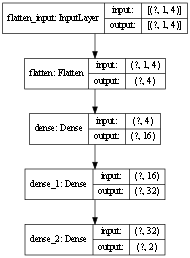

In [5]:
# Create the agent
brain = create_brain(states, actions)
print(f"Number of parameters: {brain.count_params():,}")
plot_model(brain, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=48)

In [6]:
def create_agent(model, actions):
    """ Create an agent: model + policy + memory
    """
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                   nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [7]:
# Create agent
dqn = create_agent(brain, actions)
dqn.compile(optimizer=Adam(lr=1e-3), metrics=['mae'])

In [8]:
# Train agent
dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

Training for 50000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 14:34 - reward: 1.0000

C:\Users\Paco\miniconda3\envs\py37\lib\site-packages\rl\memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


10000/10000 [==============================] - 136s 14ms/step - reward: 1.0000
99 episodes - episode_reward: 100.545 [11.000, 200.000] - loss: 3.526 - mae: 18.737 - mean_q: 37.921

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 99s 10ms/step - reward: 1.0000
51 episodes - episode_reward: 195.647 [158.000, 200.000] - loss: 5.405 - mae: 38.726 - mean_q: 78.368

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 99s 10ms/step - reward: 1.0000
50 episodes - episode_reward: 200.000 [200.000, 200.000] - loss: 8.406 - mae: 43.355 - mean_q: 87.233

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 97s 10ms/step - reward: 1.0000
50 episodes - episode_reward: 198.960 [176.000, 200.000] - loss: 11.128 - mae: 45.459 - mean_q: 91.362

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 93s 9ms/step - reward: 1.0000
done, took 525.022 seconds


In [9]:
dqn.test(env, nb_episodes=20, visualize=True)

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200
